In [2]:
import numpy as np

# Load in the data.
X = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3],
])

Y = np.array([
    399900,
    329900,
    369000,
    232000,
    539900,
    299900,
    314900,
    198999,
    212000,
    242500,
]).reshape((-1, 1))

# Normalise the data
X_mean, X_std = ((np.mean(X, axis=0), np.std(X, axis=0)))
x = (X-X_mean)/(X_std)


Y_mean, Y_std = np.mean(Y), np.std(Y)

y = (Y-Y_mean)/Y_std


N, D_in = x.shape
N, D_out = y.shape
H = 5 # Number of neurons in hidden layer

#Define activation function
sigmoid = lambda x: 1/(1+np.exp(-x))



#Initialise weights for bias terms in hidden layer
w1, w2, w3, w4, w5 = np.random.randn(H) 
# Weights for x1 to all neurons.
w6, w7, w8, w9, w10 = np.random.randn(H)
# Weights for x2 to all neurons.
w11, w12, w13, w14, w15 = np.random.randn(H)
# Weights for hidden layer outputs to output neuron.
w16, w17, w18, w19, w20, w21 = np.random.randn(H + 1)

#Hidden layer
hidden_layer_inputs = np.hstack([ x, np.ones((N, 1))])

hidden_layer_weights = np.array([
    [ w1,  w2,  w3,  w4,  w5],
    [ w6,  w7,  w8,  w9, w10],
    [w11, w12, w13, w14, w15]
    
])


hidden_layer_sums = hidden_layer_inputs @ hidden_layer_weights
hidden_layer_outputs = sigmoid(hidden_layer_sums)


#Output layer
output_layer_inputs = np.hstack([hidden_layer_outputs, np.ones((N, 1))])
output_layer_weights = np.array([w16, w17, w18, w19, w20, w21]).T


output_layer_sums = output_layer_inputs @ output_layer_weights
output_layer_outputs = sigmoid(output_layer_sums)

#Calculate loss function: total error in predictions compared to target
loss = 0.5*np.sum((output_layer_outputs-y)**2)

print(f"Initial loss: {loss:.0e}")

Initial loss: 6e+01


In [3]:
num_epochs = 100000
losses = np.empty(num_epochs)

eta = 1e-3
for epoch in range(num_epochs):

    # Hidden layer.
    hidden_layer_inputs = np.hstack([
        np.ones((N, 1)),
        x
    ])
    hidden_layer_weights = np.array([
        [ w1,  w2,  w3,  w4,  w5],
        [ w6,  w7,  w8,  w9, w10],
        [w11, w12, w13, w14, w15]
    ])

    alpha_h = hidden_layer_inputs @ hidden_layer_weights
    beta_h = sigmoid(alpha_h)

    # Output layer.
    output_layer_inputs = np.hstack([
        np.ones((N, 1)),
        beta_h
    ])
    output_layer_weights = np.array([
        [w16, w17, w18, w19, w20, w21]
    ]).T


    alpha_o = output_layer_inputs @ output_layer_weights
    beta_o = sigmoid(alpha_o)

    y_pred = beta_o

    # Calculate our loss function: the average error in our predictions compared to the target.
    # (This is also known as the mean squared error).
    loss = 0.5 * np.sum((y_pred - y)**2)
    if not epoch % 100:
        print(epoch, loss)

    losses[epoch] = loss

    # Calculate gradients.
    s = (beta_o - y) * beta_o * (1 - beta_o)
    dE_dw21 = s * beta_h[:, [4]]
    dE_dw20 = s * beta_h[:, [3]]
    dE_dw19 = s * beta_h[:, [2]]
    dE_dw18 = s * beta_h[:, [1]]
    dE_dw17 = s * beta_h[:, [0]]
    dE_dw16 = s
    dE_dw15 = s * w21 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [1]]
    dE_dw14 = s * w20 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [1]]
    dE_dw13 = s * w19 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [1]]
    dE_dw12 = s * w18 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [1]]
    dE_dw11 = s * w17 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [1]]
    dE_dw10 = s * w21 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [0]]
    dE_dw9  = s * w20 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [0]]
    dE_dw8  = s * w19 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [0]]
    dE_dw7  = s * w18 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [0]]
    dE_dw6  = s * w17 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [0]]
    dE_dw5  = s * w21 * beta_h[:, [4]] * (1 - beta_h[:, [4]])
    dE_dw4  = s * w20 * beta_h[:, [3]] * (1 - beta_h[:, [3]])
    dE_dw3  = s * w19 * beta_h[:, [2]] * (1 - beta_h[:, [2]])
    dE_dw2  = s * w18 * beta_h[:, [1]] * (1 - beta_h[:, [1]])
    dE_dw1  = s * w17 * beta_h[:, [0]] * (1 - beta_h[:, [0]])

    # Now update the weights using stochastic gradient descent.
    w1 = w1 - eta * np.sum(dE_dw1)
    w2 = w2 - eta * np.sum(dE_dw2)
    w3 = w3 - eta * np.sum(dE_dw3)
    w4 = w4 - eta * np.sum(dE_dw4)
    w5 = w5 - eta * np.sum(dE_dw5)
    w6 = w6 - eta * np.sum(dE_dw6)
    w7 = w7 - eta * np.sum(dE_dw7)
    w8 = w8 - eta * np.sum(dE_dw8)
    w9 = w9 - eta * np.sum(dE_dw9)
    w10 = w10 - eta * np.sum(dE_dw10)
    w11 = w11 - eta * np.sum(dE_dw11)
    w12 = w12 - eta * np.sum(dE_dw12)
    w13 = w13 - eta * np.sum(dE_dw13)
    w14 = w14 - eta * np.sum(dE_dw14)
    w15 = w15 - eta * np.sum(dE_dw15)
    w16 = w16 - eta * np.sum(dE_dw16)
    w17 = w17 - eta * np.sum(dE_dw17)
    w18 = w18 - eta * np.sum(dE_dw18)
    w19 = w19 - eta * np.sum(dE_dw19)
    w20 = w20 - eta * np.sum(dE_dw20)
    w21 = w21 - eta * np.sum(dE_dw21)

0 4.718420049278089
100 4.428235930573409
200 4.23746132130782
300 4.106272057374896
400 4.010992009886214
500 3.9380208250257596
600 3.8794855004210005
700 3.830718127429426
800 3.7888652883953697
900 3.752123001854456
1000 3.719309474155175
1100 3.6896215355030826
1200 3.66249272055979
1300 3.6375087598141533
1400 3.614356166705629
1500 3.592790276813792
1600 3.5726149312702713
1700 3.553669254707335
1800 3.5358188324076405
1900 3.5189496651212804
2000 3.5029639115193714
2100 3.487776804885201
2200 3.473314358219443
2300 3.459511611184534
2400 3.446311258590368
2500 3.433662554274049
2600 3.4215204186788992
2700 3.4098447006805133
2800 3.3985995587963167
2900 3.3877529366485484
3000 3.377276114165149
3100 3.3671433205859413
3200 3.3573313985815343
3300 3.3478195111299103
3400 3.338588884516425
3500 3.329622582114082
3600 3.3209053045872063
3700 3.312423212927415
3800 3.304163771333789
3900 3.296115607430123
4000 3.288268387699765
4100 3.280612706333965
4200 3.2731399859482
4300 3.265

34400 2.821846637350043
34500 2.8216203777241944
34600 2.821395725441381
34700 2.821172665550531
34800 2.820951183266564
34900 2.8207312639683124
35000 2.8205128931964727
35100 2.820296056651581
35200 2.8200807401920156
35300 2.819866929832034
35400 2.819654611739826
35500 2.8194437722356014
35600 2.8192343977896974
35700 2.819026475020719
35800 2.8188199906936937
35900 2.818614931718266
36000 2.818411285146896
36100 2.8182090381731055
36200 2.818008178129727
36300 2.8178086924871906
36400 2.817610568851826
36500 2.81741379496419
36600 2.817218358697419
36700 2.817024248055597
36800 2.8168314511721495
36900 2.8166399563082627
37000 2.8164497518513145
37100 2.816260826313337
37200 2.8160731683294893
37300 2.8158867666565612
37400 2.8157016101714842
37500 2.8155176878698778
37600 2.815334988864598
37700 2.815153502384324
37800 2.8149732177721427
37900 2.814794124484173
38000 2.8146162120881897
38100 2.8144394702622817
38200 2.8142638887935143
38300 2.8140894575766193
38400 2.813916166612

67800 2.788915728254271
67900 2.788875850964337
68000 2.7888361255439227
68100 2.788796551186976
68200 2.7887571270928664
68300 2.7887178524663407
68400 2.7886787265174777
68500 2.788639748461647
68600 2.7886009175194664
68700 2.7885622329167594
68800 2.7885236938845117
68900 2.7884852996588316
69000 2.7884470494809137
69100 2.7884089425969867
69200 2.7883709782582846
69300 2.7883331557210016
69400 2.788295474246251
69500 2.78825793310003
69600 2.78822053155318
69700 2.7881832688813475
69800 2.788146144364945
69900 2.788109157289114
70000 2.7880723069436892
70100 2.7880355926231615
70200 2.7879990136266355
70300 2.787962569257804
70400 2.7879262588249003
70500 2.7878900816406724
70600 2.7878540370223397
70700 2.7878181242915656
70800 2.7877823427744146
70900 2.787746691801323
71000 2.787711170707067
71100 2.7876757788307214
71200 2.7876405155156343
71300 2.7876053801093876
71400 2.787570371963767
71500 2.7875354904347303
71600 2.7875007348823724
71700 2.787466104670896
71800 2.78743159

In [48]:
import numpy as np
from scipy.optimize import check_grad

def f(p):

    w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, \
        w14, w15, w16, w17, w18, w19, w20, w21 = p

    # Hidden layer.
    hidden_layer_inputs = np.hstack([
        np.ones((N, 1)),
        x
    ])
    hidden_layer_weights = np.array([
        [ w1,  w2,  w3,  w4,  w5],
        [ w6,  w7,  w8,  w9, w10],
        [w11, w12, w13, w14, w15]
    ])

    alpha_h = hidden_layer_inputs @ hidden_layer_weights
    beta_h = sigmoid(alpha_h)

    # Output layer.
    output_layer_inputs = np.hstack([
        np.ones((N, 1)),
        beta_h
    ])
    output_layer_weights = np.array([
        [w16, w17, w18, w19, w20, w21]
    ]).T

    alpha_o = output_layer_inputs @ output_layer_weights
    beta_o = sigmoid(alpha_o)

    y_pred = beta_o

    return 0.5 * np.sum((y_pred - y)**2)


def g(p):
    w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, \
        w14, w15, w16, w17, w18, w19, w20, w21 = p

    # Hidden layer.
    hidden_layer_inputs = np.hstack([
        np.ones((N, 1)),
        x
    ])
    hidden_layer_weights = np.array([
        [ w1,  w2,  w3,  w4,  w5],
        [ w6,  w7,  w8,  w9, w10],
        [w11, w12, w13, w14, w15]
    ])

    alpha_h = hidden_layer_inputs @ hidden_layer_weights
    beta_h = sigmoid(alpha_h)

    # Output layer.
    output_layer_inputs = np.hstack([
        np.ones((N, 1)),
        beta_h
    ])
    output_layer_weights = np.array([
        [w16, w17, w18, w19, w20, w21]
    ]).T

    alpha_o = output_layer_inputs @ output_layer_weights
    beta_o = sigmoid(alpha_o)

    # Calculate gradients.
    s = (beta_o - y) * beta_o * (1 - beta_o)
    dE_dw21 = s * beta_h[:, [4]]
    dE_dw20 = s * beta_h[:, [3]]
    dE_dw19 = s * beta_h[:, [2]]
    dE_dw18 = s * beta_h[:, [1]]
    dE_dw17 = s * beta_h[:, [0]]
    dE_dw16 = s
    dE_dw15 = s * w21 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [1]]
    dE_dw14 = s * w20 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [1]]
    dE_dw13 = s * w19 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [1]]
    dE_dw12 = s * w18 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [1]]
    dE_dw11 = s * w17 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [1]]
    dE_dw10 = s * w21 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [0]]
    dE_dw9  = s * w20 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [0]]
    dE_dw8  = s * w19 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [0]]
    dE_dw7  = s * w18 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [0]]
    dE_dw6  = s * w17 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [0]]
    dE_dw5  = s * w21 * beta_h[:, [4]] * (1 - beta_h[:, [4]])
    dE_dw4  = s * w20 * beta_h[:, [3]] * (1 - beta_h[:, [3]])
    dE_dw3  = s * w19 * beta_h[:, [2]] * (1 - beta_h[:, [2]])
    dE_dw2  = s * w18 * beta_h[:, [1]] * (1 - beta_h[:, [1]])
    dE_dw1  = s * w17 * beta_h[:, [0]] * (1 - beta_h[:, [0]])

    return np.array([
        np.sum(dE_dw1),
        np.sum(dE_dw2),
        np.sum(dE_dw3),
        np.sum(dE_dw4),
        np.sum(dE_dw5),
        np.sum(dE_dw6),
        np.sum(dE_dw7),
        np.sum(dE_dw8),
        np.sum(dE_dw9),
        np.sum(dE_dw10),
        np.sum(dE_dw11),
        np.sum(dE_dw12),
        np.sum(dE_dw13),
        np.sum(dE_dw14),
        np.sum(dE_dw15),
        np.sum(dE_dw16),
        np.sum(dE_dw17),
        np.sum(dE_dw18),
        np.sum(dE_dw19),
        np.sum(dE_dw20),
        np.sum(dE_dw21)
    ])

assert 1e-6 > check_grad(f, g, np.random.normal(size=21))

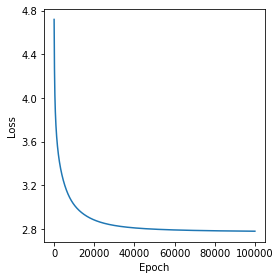

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(losses)
ax.set_xlabel(r"Epoch")
ax.set_ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()

In [ ]:
!pip install torch
# Can implement the same model in PyTorch
import torch
import numpy as np
X = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3],
])

Y = np.atleast_2d([
    399900,
    329900,
    369000,
    232000,
    539900,
    299900,
    314900,
    198999,
    212000,
    242500,
]).T


Y_mean, Y_std = (np.mean(Y), np.std(Y))
y = (Y-Y_mean)/Y_std


X_mean, X_std = (np.mean(X, axis=0), np.std(X, axis=0))
x = (X - X_mean) / X_std

N, D_in = x.shape
N, D_out = y.shape
H = 5
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


#Construct the model
model = torch.nn.Sequential(torch.nn.Linear(D_in, H), 
                           torch.nn.Sigmoid(), 
                           torch.nn.Linear(H, D_out))

loss_fn = torch.nn.MSELoss(reduction='sum')


epochs = 100000
learning_rate = 1e-4

losses = np.empty(epochs)
for t in range(epochs):
    #Forward pass
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    losses[t] = loss.item()
    
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Backward pass
    loss.backward()
    
    #Update the weights using gradient descent
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            

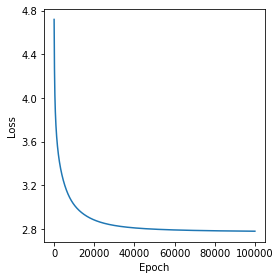

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot the losses with time.
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

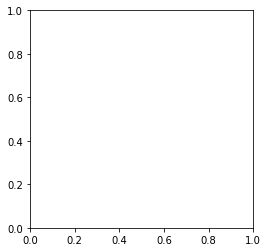

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(
    Y / 1000, 
    (y_pred.detach().flatten() * Y_std + Y_mean) / 1000
)

lims = np.array([
    ax.get_xlim(),
    ax.get_ylim()
])
lims = (np.min(lims), np.max(lims))
ax.plot(
    lims,
    lims,
    lw=1,
    ls=":",
    c="#666666",
    zorder=-1
)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel(r"$\textrm{Actual price}$ $(\textrm{k})$")
ax.set_ylabel(r"$\textrm{Predicted price}$ $(\textrm{k})$")

ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()